In [1]:
# importing packages and modules
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.optimize import minimize
from utils import *
from plotting_utils import *
from analysis_utils import *
import dglm_hmm2
import dglm_hmm1
from scipy.stats import multivariate_normal, norm

In [2]:
days = ['d1_balbc','d2_balbc','d3_balbc','d4_balbc','d5_balbc','d6_balbc','d7_balbc','d8_balbc','d9_mCD1']

In [3]:
df = pd.read_csv(f'../data_falkner/30L_d1_balbc_t1_features.csv', index_col=0)
df.head()

,proximity,resident2intruder head-head,resident2intruder head-tti,resident2intruder head-centroid,intruder2resident head-tti,intruder2resident head-centroid,resident2intruder head2centroid angle,intruder2resident head2centroid angle,resident centroid roc 100 ms,intruder centroid roc 100 ms,...,proximity abs reverse roc 4000 ms,ious,resident centroid2nose angle,intruder centroid2nose angle,resident tailbase2head angle,intruder tailbase2head angle,resident tti2head,intruder tti2head,resident trunk2head,intruder trunk2head
0,1.444985,1.845502,3.418435,2.579383,-0.735399,0.437936,1.368316,-1.290436,-2.311371,-2.607998,...,-1.561126,-1.420204,-2.636599,-3.067271,-0.966691,-1.006458,2.545018,1.192802,2.998777,1.400865
1,1.601712,2.138670,3.623804,2.816504,-0.451596,0.641202,1.412978,-1.261181,-2.311371,-2.607998,...,-0.993839,-1.420204,-2.533099,-3.004445,-1.085348,-1.015261,2.366435,1.106513,2.687689,1.208084
2,1.801961,2.363154,3.734497,2.948585,-0.183119,0.952638,1.416177,-1.116090,-2.311371,-2.607998,...,-0.521011,-1.420204,-2.363581,-2.896870,-1.203728,-1.123694,2.275502,1.218209,2.273145,1.207988
3,2.142855,2.491560,3.811409,3.057231,0.024326,1.297601,1.522112,-1.097222,-2.311371,-2.607998,...,0.290531,-1.420204,-2.188309,-2.776206,-1.065220,-1.198128,1.964262,1.369925,2.194235,0.991935
4,2.121549,2.531440,3.647082,2.978336,0.214412,1.412444,1.551333,-1.077486,-2.311371,-1.039061,...,0.351168,-1.420204,-2.068414,-2.678286,-0.827499,-0.642620,1.347436,1.511040,1.474599,1.486965


In [11]:
featuresShortlist = ["proximity","resident2intruder head2centroid angle", "intruder2resident head2centroid angle","resident centroid roc 500 ms", "intruder centroid roc 500 ms",
   "resident tti2head", "intruder tti2head", "resident tailbase2head angle", "intruder tailbase2head angle"]

In [14]:
# READING WHOLE DATAFRAME

# 55 feature columns
# 9 days and 3 sessions per day
a = np.genfromtxt(f'../data_falkner/30L_d1_balbc_t1_features.csv', delimiter=',', skip_header=1, usecols=range(1,56))
sessInd = [0]
s = 0
for day in days:
    for  sess in range(1,4):
        df = pd.read_csv(f'../data_falkner/30L_{day}_t{sess}_features.csv', index_col=0)
        print(len(df.index.tolist()))
        s = s + len(df.index.tolist())
        sessInd.append(s)
        temp = np.genfromtxt(f'../data_falkner/30L_{day}_t{sess}_features.csv', delimiter=',', skip_header=1, usecols=range(1,56))
        if (day != 'd1_balbc' or sess != 1):
            a = np.concatenate((a,temp))

print(a.shape)

20164
21054
20849
21063
21215
22028
21055
20924
21413
21550
20987
21019
21204
20917
21071
21137
21004
20791
22095
21844
22265
20162
20707
20856
9490
9685
9841
(536390, 55)


In [16]:
df = pd.read_csv(f'../data_falkner/30L_d1_balbc_t1_features.csv', index_col=0)
df = df[featuresShortlist]
a = np.array(df)
print(a.shape)
sessInd = [0]
s = 0
for day in days:
    for  sess in range(1,4):
        temp = pd.read_csv(f'../data_falkner/30L_{day}_t{sess}_features.csv', index_col=0)
        temp = temp[featuresShortlist]

        s = s + len(temp.index.tolist())
        sessInd.append(s)

        if (day != 'd1_balbc' or sess != 1):
            a = np.concatenate((a,np.array(temp)))

(20164, 9)


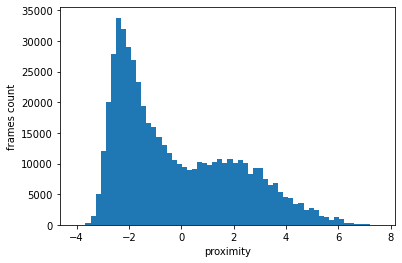

In [6]:
plt.hist(a[:,0], bins=60)
plt.ylabel('frames count')
plt.xlabel('proximity')
plt.show()